In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
with_mask = os.listdir(r"C:\Users\carna\Desktop\Face Mask Detection\data\with_mask")
print(with_mask[0:5])
print(with_mask[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [3]:
without_mask = os.listdir(r"C:\Users\carna\Desktop\Face Mask Detection\data\without_mask")
print(without_mask[0:5])
print(without_mask[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [4]:
print('number of masked images',len(with_mask))
print('number of without masked images',len(without_mask))

number of masked images 3725
number of without masked images 3828


Creating Labels for the two Classes

wearing mask -> 1
not wearing mask -> 0

In [5]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [6]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [8]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

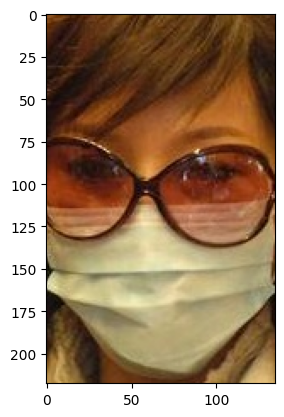

In [9]:

#with mask

img = mpimg.imread(r'C:\Users\carna\Desktop\Face Mask Detection\data\with_mask\with_mask_10.jpg')
imgplot = plt.imshow(img)

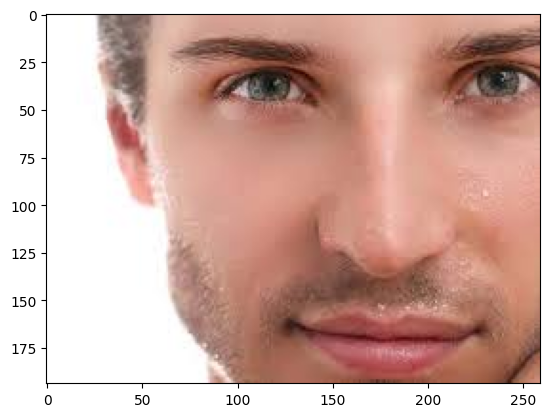

In [10]:

#without Mask

img = mpimg.imread(r'C:\Users\carna\Desktop\Face Mask Detection\data\without_mask\without_mask_995.jpg')
imgplot = plt.imshow(img)

Image Processing

In [11]:
#Converting images to numpy array

with_mask_path = r"C:\Users\carna\Desktop\Face Mask Detection\data\with_mask\\"

data = []

for img_file in with_mask:
    print(img_file)
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


without_mask_path = r"C:\Users\carna\Desktop\Face Mask Detection\data\without_mask\\"
for img_file in without_mask:
    print(img_file)
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

with_mask_1.jpg
with_mask_10.jpg
with_mask_100.jpg
with_mask_1000.jpg
with_mask_1001.jpg
with_mask_1002.jpg
with_mask_1003.jpg
with_mask_1004.jpg
with_mask_1005.jpg
with_mask_1006.jpg
with_mask_1007.jpg
with_mask_1008.jpg
with_mask_1009.jpg
with_mask_101.jpg
with_mask_1010.jpg
with_mask_1011.jpg
with_mask_1012.jpg
with_mask_1013.jpg
with_mask_1014.jpg
with_mask_1015.jpg
with_mask_1016.jpg
with_mask_1017.jpg
with_mask_1018.jpg
with_mask_1019.jpg
with_mask_102.jpg
with_mask_1020.jpg
with_mask_1021.jpg
with_mask_1022.jpg
with_mask_1023.jpg
with_mask_1024.jpg
with_mask_1025.jpg
with_mask_1026.jpg
with_mask_1027.jpg
with_mask_1028.jpg
with_mask_1029.jpg
with_mask_103.jpg
with_mask_1030.jpg
with_mask_1031.jpg
with_mask_1032.jpg
with_mask_1033.jpg
with_mask_1034.jpg
with_mask_1035.jpg
with_mask_1036.jpg
with_mask_1037.jpg
with_mask_1038.jpg
with_mask_1039.jpg
with_mask_104.jpg
with_mask_1040.jpg
with_mask_1041.jpg
with_mask_1042.jpg
with_mask_1043.jpg
with_mask_1044.jpg
with_mask_1045.jpg
wit

c:\Users\carna\.conda\envs\newenv\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


with_mask_3148.jpg
with_mask_3149.jpg
with_mask_315.jpg
with_mask_3150.jpg
with_mask_3151.jpg
with_mask_3152.jpg
with_mask_3153.jpg
with_mask_3154.jpg
with_mask_3155.jpg
with_mask_3156.jpg
with_mask_3157.jpg
with_mask_3158.jpg
with_mask_3159.jpg
with_mask_316.jpg
with_mask_3160.jpg
with_mask_3161.jpg
with_mask_3162.jpg
with_mask_3163.jpg
with_mask_3164.jpg
with_mask_3165.jpg
with_mask_3166.jpg
with_mask_3167.jpg
with_mask_3168.jpg
with_mask_3169.jpg
with_mask_317.jpg
with_mask_3170.jpg
with_mask_3171.jpg
with_mask_3172.jpg
with_mask_3173.jpg
with_mask_3174.jpg
with_mask_3175.jpg
with_mask_3176.jpg
with_mask_3177.jpg
with_mask_3178.jpg
with_mask_3179.jpg
with_mask_318.jpg
with_mask_3180.jpg
with_mask_3181.jpg
with_mask_3182.jpg
with_mask_3183.jpg
with_mask_3184.jpg
with_mask_3185.jpg
with_mask_3186.jpg
with_mask_3187.jpg
with_mask_3188.jpg
with_mask_3189.jpg
with_mask_319.jpg
with_mask_3190.jpg
with_mask_3191.jpg
with_mask_3192.jpg
with_mask_3193.jpg
with_mask_3194.jpg
with_mask_3195.jp

In [12]:
len(data)

7553

In [13]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [14]:
type(data[0])

numpy.ndarray

In [15]:
data[0].shape

(128, 128, 3)

Converting image list and label list to numpy arrays

In [16]:
X = np.array(data)
Y = np.array(labels)

In [17]:
type(X)

numpy.ndarray

In [18]:
type(Y)

numpy.ndarray

In [19]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


 Train Test Split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

Scaling the data

In [21]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

Building CNN

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [23]:
num_of_classes = 2

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),activation='relu' , input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size = (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(num_of_classes,activation = 'sigmoid'))

In [24]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [26]:
history = model.fit(X_train_scaled ,y_train , validation_split = 0.1 , epochs = 10)

Epoch 1/10
170/170 [==============================] - 24s 40ms/step - loss: 0.4953 - accuracy: 0.7732 - val_loss: 0.3084 - val_accuracy: 0.8678
Epoch 2/10
170/170 [==============================] - 7s 39ms/step - loss: 0.3094 - accuracy: 0.8775 - val_loss: 0.2513 - val_accuracy: 0.9041
Epoch 3/10
170/170 [==============================] - 6s 36ms/step - loss: 0.2511 - accuracy: 0.8992 - val_loss: 0.2283 - val_accuracy: 0.9289
Epoch 4/10
170/170 [==============================] - 6s 36ms/step - loss: 0.2152 - accuracy: 0.9132 - val_loss: 0.2085 - val_accuracy: 0.9256
Epoch 5/10
170/170 [==============================] - 6s 36ms/step - loss: 0.1809 - accuracy: 0.9294 - val_loss: 0.2267 - val_accuracy: 0.9273
Epoch 6/10
170/170 [==============================] - 6s 36ms/step - loss: 0.1635 - accuracy: 0.9347 - val_loss: 0.2381 - val_accuracy: 0.9273
Epoch 7/10
170/170 [==============================] - 6s 36ms/step - loss: 0.1611 - accuracy: 0.9375 - val_loss: 0.2318 - val_accuracy: 0.927

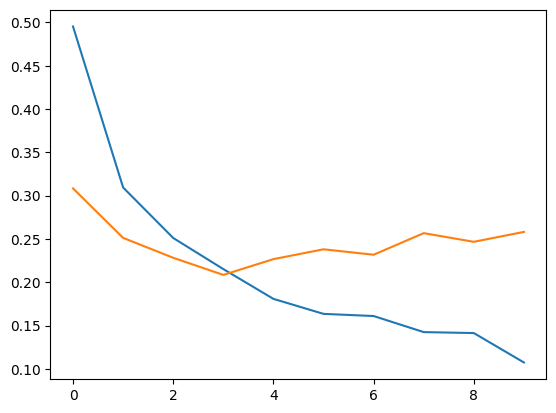

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

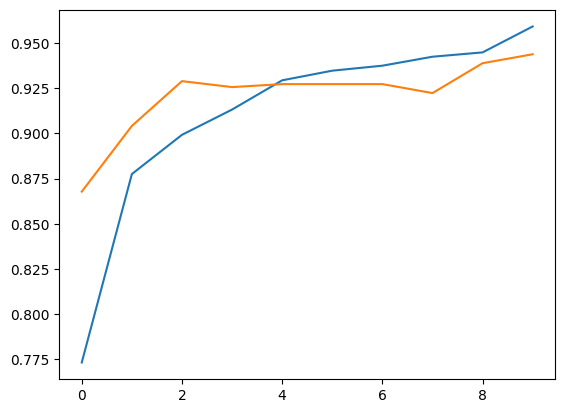

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])